In [18]:
# 1 : 전체데이터, PCA(Q_Ques), TP~, Human (PCA + 20)

In [20]:
import pandas as pd
df1 = pd.read_csv('/Users/harryjeong/DA/DA_Project/KIC_Project/Data/maki_train.csv')
df2 = pd.read_csv('/Users/harryjeong/DA/DA_Project/KIC_Project/Data/maki_test_x.csv')
submission = pd.read_csv('/Users/harryjeong/DA/DA_Project/KIC_Project/Data/sample_submission.csv')

In [21]:
# df1을 종속변수 독립변수로 분리
train_y = df1.voted
df1 = df1.drop('voted', axis = 1)

In [22]:
# 제거할 변수 목록 저장
drop1 = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QkE',
          'QjE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE','QtE',
          'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13' ]

# df1, df2에서 위 목록 제거
df1 = df1.drop(drop1,axis=1)
df2 = df2.drop(drop1,axis=1)
df1 = df1.iloc[:,1:]
df2 = df2.iloc[:,1:]

In [23]:
# 라벨인코더 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df1['gender_code'] = label.fit_transform(df1['gender'])
df1['age_group_code'] = label.fit_transform(df1['age_group'])
df1['race_code'] = label.fit_transform(df1['race'])
df1['religion_code'] = label.fit_transform(df1['religion'])

df2['gender_code'] = label.fit_transform(df2['gender'])
df2['age_group_code'] = label.fit_transform(df2['age_group'])
df2['race_code'] = label.fit_transform(df2['race'])
df2['religion_code'] = label.fit_transform(df2['religion'])

drop3= ['gender','age_group','race','religion']
df1 = df1.drop(drop3,axis=1)
df2= df2.drop(drop3,axis=1)

In [24]:
# 스케일링
from sklearn.preprocessing import StandardScaler as standard
m_sc = standard()
m_sc.fit(df1)
train_x_sc = m_sc.transform(df1)
test_x_sc = m_sc.transform(df2)

# 데이터프레임으로 변경
from pandas import DataFrame
df1 = DataFrame(train_x_sc, columns = df1.columns.tolist())
df2 = DataFrame(test_x_sc,columns = df1.columns.tolist())

In [25]:
df1.columns

Index(['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA',
       'education', 'engnat', 'familysize', 'hand', 'married', 'tp01', 'tp02',
       'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'gender_code', 'age_group_code', 'race_code', 'religion_code'],
      dtype='object')

In [26]:
# Q_Ques만 뽑아서 PCA 진행
Q_Ques = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
           'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
           'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
           'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

# Q_Ques 선택한 변수 세팅
qdf1 = df1.loc[:,Q_Ques]
qdf2 = df2.loc[:,Q_Ques]

# 추후 합해야 하므로 Q_Ques 제거한 변수 세팅
df1 = df1.drop(Q_Ques,axis = 1)
df2 = df2.drop(Q_Ques,axis = 1)

In [13]:
# PCA
import numpy as np
vscore_te = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95] :
    from sklearn.decomposition import PCA
    m_pca = PCA(n_components = i)            # n_components : 인공변수 갯수 
    m_pca.fit(qdf1)                       # y의 fitting 필요 없음 
    
    train_x_pca = m_pca.transform(qdf1)
    test_x_pca = m_pca.transform(qdf2)
    
    s1_columns = np.arange(1, len(train_x_pca[1]) + 1)
    train_x_pca = DataFrame(train_x_pca, columns = s1_columns)
    test_x_pca = DataFrame(test_x_pca, columns = s1_columns)
    
    c1 = train_x_pca.columns.tolist()
    c2 = df1.columns.tolist()
    c3 = c1 + c2
    
    df1_new = DataFrame(np.hstack([train_x_pca, df1]), columns = c3)
    df2_new = DataFrame(np.hstack([test_x_pca, df2]), columns = c3)
    
    # train_test_split 
    from sklearn.model_selection import train_test_split
    train_x1, test_x1, train_y1, test_y1 = train_test_split(df1_new, train_y, random_state= 0)
    
    # RF
    from sklearn.ensemble import RandomForestClassifier as rf_c
    m_rf = rf_c(random_state = 0)
    m_rf.fit(train_x1, train_y1)
    
    # test 데이터로 체크
    vscore_te.append(m_rf.score(test_x1, test_y1))    # best score = 0.6977949 (0.7)

In [14]:
vscore_te

[0.6952472986031801,
 0.6952472986031801,
 0.6952472986031801,
 0.6920846876921726,
 0.695862250724765,
 0.6970921549679346,
 0.6923482386014231,
 0.697794957392603,
 0.6942809452692612,
 0.6959501010278486,
 0.6928753404199245,
 0.6941052446630941,
 0.6920846876921726]

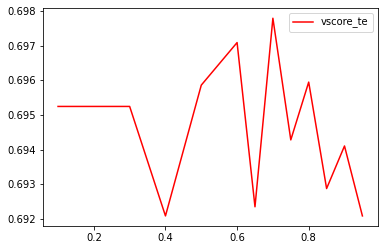

In [11]:
import matplotlib.pyplot as plt
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
         vscore_te, label = 'vscore_te', color = 'red')
plt.legend()

In [12]:
# PCA 인공변수 개수 고정 및 RF 매개변수 튜닝
from sklearn.decomposition import PCA
m_pca = PCA(n_components = 0.7)            # n_components : 인공변수 갯수 
m_pca.fit(qdf1)                       # y의 fitting 필요 없음 
    
train_x_pca = m_pca.transform(qdf1)
test_x_pca = m_pca.transform(qdf2)
    
s1_columns = np.arange(1, len(train_x_pca[1]) + 1)
train_x_pca = DataFrame(train_x_pca, columns = s1_columns)
test_x_pca = DataFrame(test_x_pca, columns = s1_columns)
    
c1 = train_x_pca.columns.tolist()
c2 = df1.columns.tolist()
c3 = c1 + c2
    
df1_new = DataFrame(np.hstack([train_x_pca, df1]), columns = c3)
df2_new = DataFrame(np.hstack([test_x_pca, df2]), columns = c3)

# train_test_split 
train_x1, test_x1, train_y1, test_y1 = train_test_split(df1_new, train_y, random_state= 0)
    
v_score_te = [] ; v_score_tr = []
for i in range(1, 101) :
    m_rf = rf(random_state = 0, n_estimators = i)
    m_rf.fit(train_x1, train_y1)
    v_score_tr.append(m_rf.score(train_x1, train_y1))
    v_score_te.append(m_rf.score(test_x1, test_y1))
    
max(v_score_te)    # 0.697797
Series(v_score_te).sort_values(ascending = False)    # i = 100일때 best score    

99    0.697795
97    0.696565
96    0.696214
98    0.695774
95    0.695247
        ...   
4     0.653870
3     0.639375
2     0.631292
0     0.604937
1     0.604586
Length: 100, dtype: float64

In [13]:
c1

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
df1

,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,gender_code,age_group_code,race_code,religion_code
0,-0.578417,-0.605056,-0.004686,-0.364093,2.520215,-0.506672,-0.327448,0.137259,-1.001958,0.457191,-0.735875,2.782444,0.249957,0.931706,-0.765043,-1.547786,-1.065903,0.471411,0.575915,1.950234
1,1.546264,1.624942,-0.004686,-0.364093,-0.604882,-1.004756,-0.854580,-1.049649,-1.492815,-0.231264,-0.236034,0.542557,0.249957,-1.231904,-0.184584,1.074690,-1.065903,-0.272946,-2.018682,1.043743
2,0.483924,-0.605056,-0.004686,-0.364093,0.957666,-0.506672,0.199683,-0.456195,0.961467,1.145646,0.763648,-0.017415,1.264447,-0.691001,-0.765043,-0.236548,0.938172,0.471411,0.575915,1.950234
3,1.546264,1.624942,-0.004687,-0.364093,-0.604882,-0.506672,0.726814,-0.456195,-1.001958,-0.231264,0.263807,-0.577386,-0.257288,-0.691001,-0.765043,1.074690,-1.065903,-0.272946,-2.018682,1.043743
4,0.483924,-0.605056,-0.004687,-0.364093,0.957666,-1.004756,-0.854580,-0.456195,1.452323,-0.919719,-0.236034,-1.137358,1.264447,-0.150099,0.976335,-1.547786,0.938172,-0.272946,0.575915,-1.071403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,-0.578417,-0.605056,-0.004687,3.901414,-0.604882,-1.004756,-0.327448,2.511075,-1.001958,0.457191,1.763331,0.542557,-1.779022,2.013511,-0.184584,1.074690,-1.065903,-1.017303,0.575915,1.345907
45528,-0.578417,-0.605056,-0.004687,-0.364093,-0.604882,-0.506672,-0.327448,0.137259,-0.020246,-0.231264,0.263807,0.542557,0.249957,-0.691001,0.395875,-1.547786,0.938172,0.471411,0.575915,-0.769239
45529,-0.578417,-0.605056,-0.004687,-0.364093,-0.604882,0.489497,0.726814,0.137259,0.470611,-0.919719,-0.735875,-1.137358,-0.764532,-0.691001,0.976335,-0.236548,-1.065903,-1.017303,0.575915,0.439416
45530,1.546264,-0.605056,-0.004687,3.901414,-0.604882,-1.004756,-0.327448,-1.049649,0.470611,-0.919719,-0.735875,0.542557,-0.764532,-0.150099,-0.184584,-2.859023,0.938172,1.215767,0.575915,-0.769239


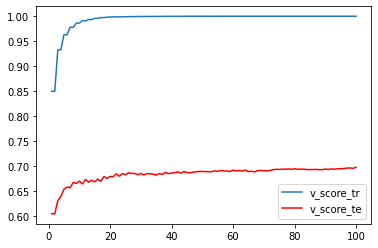

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 101), v_score_tr, label = 'v_score_tr')
plt.plot(np.arange(1, 101), v_score_te, label = 'v_score_te', color = 'red')
plt.legend()    

In [16]:
# RF
m_rf = rf(random_state = 0, n_estimators = 100)
m_rf.fit(df1_new, train_y)

pred_y = m_rf.predict(df2_new)
submission['voted'] = pred_y

In [17]:
submission

,index,voted
0,0,2
1,1,2
2,2,1
3,3,1
4,4,2
...,...,...
11378,11378,1
11379,11379,2
11380,11380,1
11381,11381,1


In [18]:
sum(submission['voted'] == 1)

6045

In [19]:
sum(submission['voted'] == 2)

5338

In [20]:
submission.to_csv('sample_submission_전체_PCA3.csv')    # 0.6998